In [89]:
#Importing Libraries
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
from sklearn.model_selection import train_test_split
import keras
from keras.models import Sequential
from keras.layers import Dense
import random

In [54]:
df1 = pd.read_csv("C:\IMG\Data 2\V_N_2.csv")
df2 = pd.read_csv("C:\IMG\Data 2\T_N_2.csv")


In [55]:
df1.reset_index(inplace=True, drop=True)
df2.reset_index(inplace=True, drop=True)
df = pd.concat([df1,df2],axis=1,join='inner')
df

,1,2,3,4,5,6,7,8,9,10,...,214,215,216,217,218,219,220,221,222,y
0,4.191120,3.963294,3.934353,3.913981,3.892256,3.878959,3.867248,3.853337,3.843842,3.834813,...,36.861855,37.022599,37.181073,37.365012,37.627555,37.840427,38.057890,38.303031,38.476446,1.856487
1,4.215261,3.968011,3.887869,3.865122,3.843037,3.885004,3.839707,3.821559,3.851694,3.870356,...,36.818276,37.015182,37.145219,37.362412,37.666726,37.796207,38.079334,38.302868,38.445339,1.856487
2,4.189327,3.968040,3.940054,3.920207,3.899267,3.886131,3.874399,3.860394,3.850762,3.841739,...,37.041780,37.193637,37.369295,37.543937,37.748089,37.953532,38.262450,38.523283,38.523283,1.846327
3,4.237146,3.919137,3.915518,3.969901,3.859206,3.893201,3.916531,3.905008,3.857741,3.835792,...,37.048669,37.217194,37.350016,37.503624,37.715347,37.964534,38.240753,38.525274,38.510168,1.846327
4,4.187692,3.969083,3.941673,3.922065,3.901177,3.888363,3.876732,3.863025,3.853106,3.844131,...,37.021134,37.181297,37.358749,37.533951,37.733590,37.954093,38.184174,38.446801,38.542891,1.835349
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
305,4.100669,3.896127,3.823492,3.800943,3.799121,3.817933,3.777732,3.825321,3.738418,3.766609,...,40.619576,40.683036,40.690040,40.671666,40.666254,40.673942,40.634114,40.693150,40.661946,1.287453
306,4.069058,3.910524,3.875702,3.850198,3.830213,3.811618,3.796092,3.784147,3.772762,3.761168,...,40.649221,40.649221,40.649221,40.649221,40.649221,40.649221,40.649221,40.649221,40.649221,1.309015
307,4.077345,3.894806,3.895636,3.887775,3.817913,3.858464,3.797755,3.816261,3.773938,3.769551,...,40.678694,40.676281,40.673836,40.621061,40.697968,40.656578,40.636833,40.673875,40.663925,1.309015
308,4.086227,3.927840,3.892792,3.867122,3.846694,3.827290,3.810949,3.798712,3.787293,3.776102,...,40.406072,40.406072,40.406072,40.406072,40.406072,40.406072,40.406072,40.406072,40.406072,1.325079


In [56]:
trainX = df.drop(columns=df.columns[222])
trainy = df['y'] 


In [57]:
trainX = trainX.to_numpy()
trainy = trainy.to_numpy()
trainy = trainy.reshape(310,1)
#Normalizing
scaler = MinMaxScaler()
Xn_train = scaler.fit_transform(trainX)
yn_train = scaler.fit_transform(trainy)


In [59]:
#Reshaping
Xn_train = Xn_train.reshape(310, 1, 222)
X_train, X_test, y_train, y_test = train_test_split(Xn_train,yn_train , test_size=0.10)

(31, 1, 222)

In [81]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, GRU
from tensorflow.keras.layers import Dense, Dropout

model = Sequential()
model.add(LSTM(64, activation='tanh', input_shape=(1,222), return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(32, activation='relu', return_sequences=False))
model.add(Dropout(0.2))
# model.add(Dense(32))
model.add(Dense(yn_train.shape[1]))

tf.keras.optimizers.Adam(
    learning_rate=0.001,
    name='Adam')

model.compile(optimizer='Adam', loss='mse')
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_8 (LSTM)               (None, 1, 64)             73472     
                                                                 
 dropout_9 (Dropout)         (None, 1, 64)             0         
                                                                 
 lstm_9 (LSTM)               (None, 32)                12416     
                                                                 
 dropout_10 (Dropout)        (None, 32)                0         
                                                                 
 dense_8 (Dense)             (None, 1)                 33        
                                                                 
Total params: 85,921
Trainable params: 85,921
Non-trainable params: 0
_________________________________________________________________


In [82]:
#fitting the model to X_train and y_train dataset, and 100 epochs and saving it into history
history = model.fit(X_train,y_train, epochs=100,batch_size=5)

Epoch 1/100
56/56 [==============================] - 4s 3ms/step - loss: 0.0785
Epoch 2/100
56/56 [==============================] - 0s 3ms/step - loss: 0.0199
Epoch 3/100
56/56 [==============================] - 0s 3ms/step - loss: 0.0150
Epoch 4/100
56/56 [==============================] - 0s 4ms/step - loss: 0.0149
Epoch 5/100
56/56 [==============================] - 0s 3ms/step - loss: 0.0127
Epoch 6/100
56/56 [==============================] - 0s 3ms/step - loss: 0.0140
Epoch 7/100
56/56 [==============================] - 0s 3ms/step - loss: 0.0135
Epoch 8/100
56/56 [==============================] - 0s 4ms/step - loss: 0.0119
Epoch 9/100
56/56 [==============================] - 0s 4ms/step - loss: 0.0096
Epoch 10/100
56/56 [==============================] - 0s 4ms/step - loss: 0.0091
Epoch 11/100
56/56 [==============================] - 0s 4ms/step - loss: 0.0069
Epoch 12/100
56/56 [==============================] - 0s 3ms/step - loss: 0.0093
Epoch 13/100
56/56 [=================

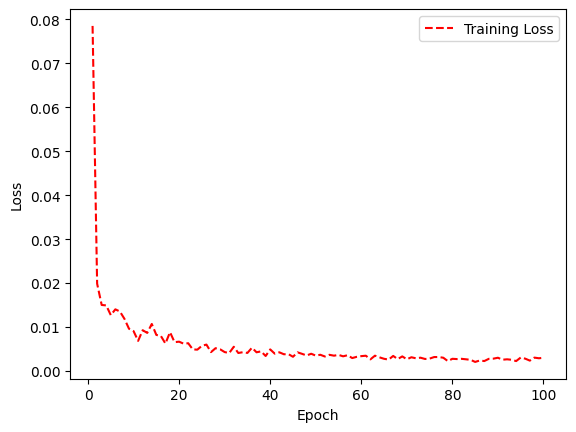

In [83]:
# Using function to get loss history
training_loss = history.history['loss']

# Code for counting the number of epochs
epoch_count = range(1, len(training_loss) + 1)

# Visualize loss history
plt.plot(epoch_count, training_loss, 'r--')
plt.legend(['Training Loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show();

In [84]:
y_pred = model.predict(X_test)
y_pred = y_pred.reshape(31,1)


1/1 [==============================] - 1s 761ms/step


In [85]:
yd_pred = scaler.inverse_transform(y_pred)
y_error = y_test - yd_pred
df5 = pd.DataFrame(y_test)
df6 = pd.DataFrame(yd_pred)
df7 = pd.DataFrame(y_error)
DFF = pd.concat([df5,df6,df7],axis=1,join='inner')
DFF

,0,0,0
0,0.843378,1.748196,-0.904818
1,0.366655,1.503780,-1.137125
2,0.844271,1.746124,-0.901853
3,0.532334,1.589850,-1.057516
4,0.000968,1.318163,-1.317195
5,0.899637,1.778989,-0.879353
6,0.028043,1.322679,-1.294636
7,0.917089,1.789974,-0.872886
8,0.984061,1.813123,-0.829063
9,0.925689,1.800888,-0.875199


In [86]:
from sklearn.metrics import mean_absolute_error
print('MAE for y: %.3f' % mean_absolute_error(y_test, yd_pred))

MAE for y: 1.063


In [88]:
#Testing with battery 18 (Still in progress, will be uploaded in a new file)

df1b18 = pd.read_csv("C:\IMG\Data 2\V_N_B18.csv")
df2b18 = pd.read_csv("C:\IMG\Data 2\T_N_B18.csv")
df1b18.reset_index(inplace=True, drop=True)
df2b18.reset_index(inplace=True, drop=True)

df = pd.concat([df1b18,df2b18],axis=1,join='inner')
df

,1,2,3,4,5,6,7,8,9,10,...,214,215,216,217,218,219,220,221,222,y
0,4.078928,3.939946,3.914805,3.895391,3.879301,3.863604,3.849697,3.839103,3.829248,3.820234,...,36.158221,36.324924,36.490612,36.669406,36.842375,37.005138,37.193403,37.368302,37.595442,1.855004
1,4.051321,3.871496,3.960254,3.972736,3.910255,3.781145,3.936478,3.747591,3.883655,3.782578,...,36.161125,36.386451,36.434257,36.695107,36.829682,36.959099,37.170452,37.278177,37.663977,1.855004
2,4.081016,3.946342,3.922020,3.903224,3.887453,3.874107,3.860170,3.847559,3.837837,3.828681,...,36.231045,36.392541,36.538191,36.713569,36.888130,37.072580,37.264702,37.525670,37.645441,1.843195
3,4.112327,3.993551,4.002708,3.883577,3.906839,3.888271,3.838989,3.859934,3.861590,3.812902,...,36.198551,36.353938,36.525102,36.712044,36.845256,37.141260,37.209395,37.428781,37.687654,1.843195
4,4.083592,3.949304,3.925013,3.906031,3.890435,3.876942,3.864826,3.852157,3.840505,3.831207,...,35.647503,35.823158,35.983319,36.150065,36.327324,36.527739,36.724173,36.954816,37.044205,1.839602
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259,4.028395,3.975290,3.830706,3.940150,3.824404,3.762548,3.761039,3.890729,3.837094,3.804800,...,37.720110,37.863128,37.754613,37.767113,37.685419,37.852258,37.807419,37.851480,37.710403,1.351865
260,4.112972,3.929747,3.894763,3.863508,3.839132,3.823455,3.809867,3.797692,3.786841,3.773653,...,37.631825,37.631825,37.631825,37.631825,37.631825,37.631825,37.631825,37.631825,37.631825,1.354797
261,4.152614,3.929006,3.991197,3.897901,3.875715,3.812992,3.785917,3.876295,3.865023,3.741078,...,37.591770,37.713405,37.690622,37.665477,37.648548,37.727108,37.688472,37.630689,37.703352,1.354797
262,4.112895,3.927064,3.891197,3.859345,3.834455,3.818501,3.804807,3.792826,3.781871,3.768244,...,37.396003,37.396003,37.396003,37.396003,37.396003,37.396003,37.396003,37.396003,37.396003,1.341051


In [52]:
from sklearn.metrics import accuracy_score
accuracy_score(trainy, y_pred)

ValueError: continuous is not supported